<a href="https://colab.research.google.com/github/MauriDeluca/pandas/blob/master/variablescomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [127]:
url = "https://raw.githubusercontent.com/MauriDeluca/pandas/master/CPS1985.csv"
df = pd.read_csv(url)
print(df.head(10))
df.drop(df.columns[0], axis='columns', inplace=True)

   Unnamed: 0   wage  education  ...         sector  union married
0           1   5.10          8  ...  manufacturing     no     yes
1        1100   4.95          9  ...  manufacturing     no     yes
2           2   6.67         12  ...  manufacturing     no      no
3           3   4.00         12  ...          other     no      no
4           4   7.50         12  ...          other     no     yes
5           5  13.07         13  ...          other    yes      no
6           6   4.45         10  ...          other     no      no
7           7  19.47         12  ...          other     no      no
8           8  13.28         16  ...  manufacturing     no     yes
9           9   8.75         12  ...          other     no      no

[10 rows x 12 columns]


In [128]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [129]:
df1.shape

(532, 11)

In [130]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1["gender"] = encoder.fit_transform(df1["gender"]) #0 female #1 male
df1["union"] = encoder.fit_transform(df1["union"]) #0 no  #1 yes
df1["sector"] = encoder.fit_transform(df1["sector"])#0 construction   #1 manufacturing #2 other
df1["married"] = encoder.fit_transform(df1["married"]) #0 no #1 yes
df1["occupation"] = encoder.fit_transform(df1["occupation"]) #0 management #1 office #2 sales #3 services #4technical #5 worker
df1["ethnicity"] = encoder.fit_transform(df1["ethnicity"]) #0 cauc #1 hispanic #2 other
df1["region"] = encoder.fit_transform(df1["region"]) #0 other   #1 south

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [131]:
df1.head(10)

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
0,5.10,8,21,35,1,0,0,5,1,0,1
1,4.95,9,42,57,0,0,0,5,1,0,1
2,6.67,12,1,19,0,0,1,5,1,0,0
3,4.00,12,4,22,0,0,1,5,2,0,0
4,7.50,12,17,35,0,0,1,5,2,0,1
5,13.07,13,9,28,0,0,1,5,2,1,0
6,4.45,10,27,43,0,1,1,5,2,0,0
7,19.47,12,9,27,0,0,1,5,2,0,0
8,13.28,16,11,33,0,0,1,5,1,0,1
9,8.75,12,9,27,0,0,1,5,2,0,0


In [132]:
from sklearn.preprocessing import MinMaxScaler
data = df1
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
dfnorm = scaler.transform(data)

MinMaxScaler(copy=True, feature_range=(0, 1))


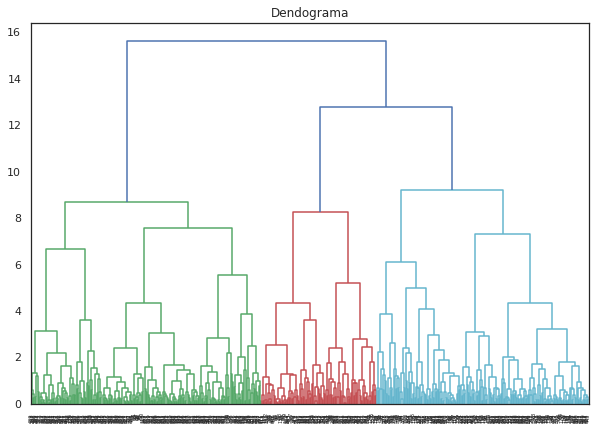

In [133]:

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograma")  
dend = shc.dendrogram(shc.linkage(dfnorm, method='ward'))  

In [134]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
categorias = cluster.fit_predict(data)
print(categorias)

[1 0 2 2 1 1 5 1 4 2 1 1 5 5 3 0 0 3 1 3 1 0 2 1 5 0 2 5 2 2 1 0 1 2 1 0 1
 0 2 1 2 1 1 1 2 1 4 1 5 2 2 1 2 1 2 1 1 1 5 5 1 5 0 2 2 5 1 1 0 0 2 3 1 2
 0 0 5 1 1 3 1 1 0 1 2 1 1 1 2 0 2 5 2 1 3 2 1 3 1 1 1 1 2 5 4 1 3 0 2 0 1
 1 0 2 5 2 1 1 1 1 2 1 5 1 2 2 5 1 2 1 2 2 1 2 1 2 2 0 0 2 1 1 1 5 5 0 2 0
 1 2 5 5 2 1 2 1 3 3 2 2 5 3 1 1 5 2 4 2 3 5 0 2 0 5 1 3 4 0 5 3 2 4 4 3 4
 1 5 1 1 0 1 2 1 1 2 5 1 3 5 0 2 4 2 2 2 3 1 1 5 4 0 1 4 3 2 5 0 2 1 5 5 0
 2 1 2 1 0 2 1 0 2 1 2 2 1 3 1 3 0 5 2 2 5 1 2 0 2 1 1 2 2 5 1 5 2 1 5 1 1
 1 5 0 1 1 5 2 5 0 1 0 2 1 5 2 5 2 2 0 2 2 2 5 2 2 1 0 5 0 2 5 2 1 2 0 5 1
 1 2 1 5 2 1 0 2 5 1 1 2 2 2 2 2 1 2 2 1 5 5 0 1 2 1 5 0 2 0 1 2 0 1 0 2 0
 1 5 1 1 0 2 0 2 2 2 1 1 0 1 5 5 5 1 0 0 0 1 0 2 1 2 1 1 1 2 2 2 1 0 1 0 0
 1 1 1 2 2 2 2 2 5 5 1 2 1 2 1 5 0 0 5 2 1 1 1 2 0 2 2 5 5 1 2 0 2 0 2 0 2
 4 0 0 1 0 2 2 5 5 2 2 5 1 1 1 2 0 0 1 0 0 4 3 2 4 5 4 4 2 1 2 1 0 2 2 4 4
 2 2 1 4 1 4 5 1 1 1 1 1 2 4 5 5 1 1 2 1 1 1 0 1 4 1 1 2 1 5 2 5 2 4 2 0 0
 1 4 0 3 2 4 1 5 4 3 1 4 

In [135]:
df1 = df1.assign(ClustCateg = categorias)
print(df1)

      wage  education  experience  age  ...  sector  union  married  ClustCateg
0     5.10          8          21   35  ...       1      0        1           1
1     4.95          9          42   57  ...       1      0        1           0
2     6.67         12           1   19  ...       1      0        0           2
3     4.00         12           4   22  ...       2      0        0           2
4     7.50         12          17   35  ...       2      0        1           1
..     ...        ...         ...  ...  ...     ...    ...      ...         ...
529  11.36         18           5   29  ...       2      0        0           2
530   6.10         12          33   51  ...       2      0        1           0
531  23.25         17          25   48  ...       2      1        1           3
532  19.88         12          13   31  ...       2      1        1           4
533  15.38         16          33   55  ...       1      0        1           0

[532 rows x 12 columns]


Text(0.5, 1.0, 'Clustering')

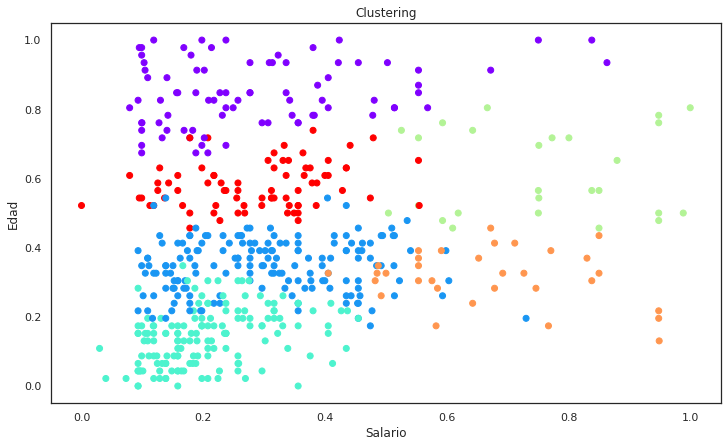

In [136]:
plt.figure(figsize=(12, 7))  
plt.scatter(dfnorm[:,0], dfnorm[:,3], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Salario")
plt.ylabel("Edad")
plt.title("Clustering")

KMEANS


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

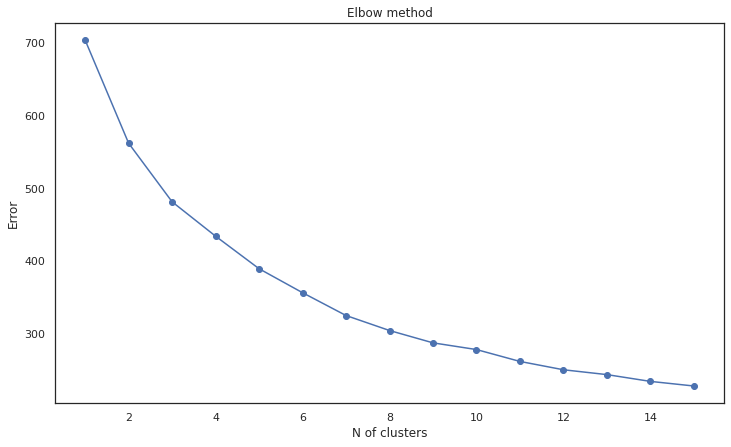

In [138]:
Error =[]
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i).fit(dfnorm)
    kmeans.fit(dfnorm)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(12, 7))
plt.plot(range(1, 16), Error, marker= "o")
plt.title('Elbow method')
plt.xlabel('N of clusters')
plt.ylabel('Error')
plt.show()

In [139]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,20))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfnorm)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfnorm, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2061139650229339)
For n_clusters = 3, silhouette score is 0.21298434585454498)
For n_clusters = 4, silhouette score is 0.2113813205400766)
For n_clusters = 5, silhouette score is 0.24549934078258437)
For n_clusters = 6, silhouette score is 0.23843838904022646)
For n_clusters = 7, silhouette score is 0.25750676713511866)
For n_clusters = 8, silhouette score is 0.2810574893948057)
For n_clusters = 9, silhouette score is 0.27969338436927504)
For n_clusters = 10, silhouette score is 0.2925141733957039)
For n_clusters = 11, silhouette score is 0.2995299926173459)
For n_clusters = 12, silhouette score is 0.2732953898636102)
For n_clusters = 13, silhouette score is 0.26192711368003607)
For n_clusters = 14, silhouette score is 0.26711707577167165)
For n_clusters = 15, silhouette score is 0.2794874949490942)
For n_clusters = 16, silhouette score is 0.2629940680219378)
For n_clusters = 17, silhouette score is 0.27426427122657204)
For n_clusters = 18, sil

In [140]:
kmeans = KMeans(n_clusters=10)
y_kmeans = kmeans.fit_predict(dfnorm)
print(y_kmeans)

kmeans.cluster_centers_

[0 0 3 3 1 6 5 3 1 3 6 6 7 5 7 1 7 6 3 1 6 6 3 7 1 7 1 1 0 1 3 9 1 9 3 3 7
 6 3 7 3 6 1 0 5 4 1 5 6 1 1 6 0 0 3 2 3 1 6 0 3 6 7 5 6 1 6 6 0 6 5 6 1 7
 4 6 4 6 1 6 3 6 2 9 6 3 6 0 9 6 7 1 3 8 1 6 0 6 0 1 6 1 3 1 2 7 6 7 6 1 6
 3 6 3 7 6 3 6 0 1 6 2 1 6 5 5 4 1 8 5 5 3 1 3 3 7 3 7 1 1 7 1 6 6 6 7 2 6
 6 7 9 1 7 5 5 1 1 7 3 9 4 3 0 3 0 3 3 6 7 0 1 2 0 3 1 0 1 0 7 1 5 3 3 1 7
 0 1 3 0 0 7 0 9 1 6 0 1 3 1 7 1 5 9 0 0 1 0 0 6 1 0 1 1 3 3 4 1 0 8 7 8 0
 5 7 0 1 0 4 9 7 4 2 1 0 1 0 0 1 6 8 2 3 7 1 5 1 3 1 0 4 0 2 8 0 2 1 2 4 2
 9 0 0 0 4 0 4 0 0 6 0 7 8 8 9 9 3 2 0 7 7 0 4 9 5 0 0 0 8 3 2 3 0 5 3 2 0
 4 2 1 2 2 0 0 2 6 3 9 4 0 9 5 9 1 2 5 2 0 8 4 4 9 6 9 0 0 0 0 2 4 0 2 0 0
 4 3 0 0 1 0 2 2 4 5 8 4 1 1 8 9 2 0 8 8 3 2 0 3 6 0 1 0 2 0 5 1 7 8 5 2 0
 0 0 3 2 6 2 4 9 6 0 2 4 4 5 7 6 8 2 0 0 1 0 1 5 8 3 2 4 6 0 9 2 3 6 8 9 3
 6 6 7 4 6 3 5 2 6 2 2 8 3 4 6 1 9 6 7 2 6 1 1 2 7 1 1 1 2 7 6 0 2 1 2 7 1
 0 1 6 2 4 0 0 3 7 1 0 2 5 1 0 0 2 5 0 2 0 2 6 4 1 1 6 0 7 7 3 1 1 6 1 1 7
 6 3 2 3 2 0 0 1 2 4 0 9 

array([[ 2.75866614e-01,  6.74747475e-01,  3.55188246e-01,
         4.49055775e-01,  2.52525253e-02,  2.22044605e-16,
        -5.55111512e-16,  4.56565657e-01,  8.98989899e-01,
         3.03030303e-02,  1.00000000e+00],
       [ 3.99100768e-01,  7.13857678e-01,  3.32175689e-01,
         4.34294089e-01,  6.17977528e-02,  2.22044605e-16,
         1.00000000e+00,  6.67415730e-01,  8.31460674e-01,
         3.33066907e-16,  1.00000000e+00],
       [ 2.96011876e-01,  6.97076023e-01,  3.11004785e-01,
         4.01983219e-01,  7.89473684e-02,  1.66533454e-16,
         4.44089210e-16,  5.61403509e-01,  9.03508772e-01,
         1.75438596e-01, -2.22044605e-16],
       [ 3.01330792e-01,  6.80874317e-01,  2.01490313e-01,
         2.67284391e-01,  1.88524590e-01,  1.66533454e-16,
         1.00000000e+00,  6.39344262e-01,  8.52459016e-01,
         2.77555756e-16,  0.00000000e+00],
       [ 2.14289245e-01,  6.35416667e-01,  3.06250000e-01,
         3.77717391e-01,  4.68750000e-02,  1.00000000e+00,
  

Text(0, 0.5, 'Experiencia')

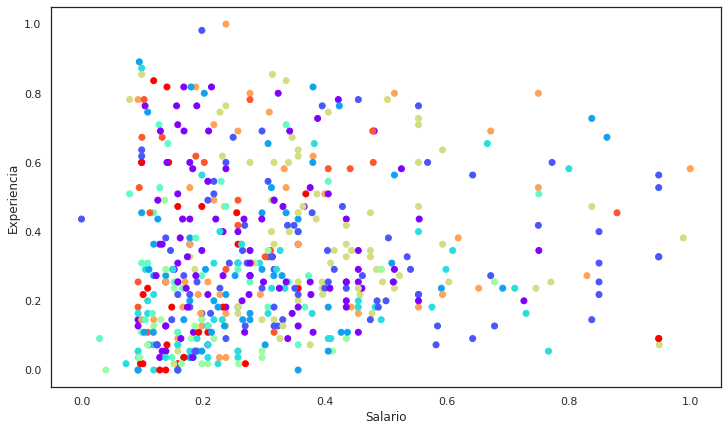

In [141]:
plt.figure(figsize=(12, 7))
plt.scatter(dfnorm[:,0],dfnorm[:,2], c=y_kmeans, cmap="rainbow")
plt.xlabel("Salario")
plt.ylabel("Experiencia")

In [142]:
from scipy.stats import norm, skew
numerical = df1.dtypes[df1.dtypes != 'object'].index

skewness = df1[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

,Skewness
ethnicity,1.948340
union,1.661882
wage,1.275900
region,0.908378
ClustCateg,0.763568
experience,0.684396
age,0.543741
education,-0.087945
gender,-0.165982
occupation,-0.393042


In [143]:
from numpy import corrcoef, transpose, arange
df1 = transpose(df1)

In [144]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533
wage,5.1,4.95,6.67,4.0,7.5,13.07,4.45,19.47,13.28,8.75,11.35,11.5,6.5,6.25,19.98,7.3,8.0,22.2,3.65,20.55,5.71,7.0,3.75,4.5,9.56,5.75,9.36,6.5,3.35,4.75,8.9,4.0,4.7,5.0,9.25,10.67,7.61,10.0,7.5,12.2,...,24.98,11.25,22.83,10.2,10.0,14.0,12.5,5.79,24.98,4.35,11.25,6.67,8.0,18.16,12.0,8.89,9.5,13.65,12.0,15.0,12.67,7.38,15.56,7.45,6.25,6.25,9.37,22.5,7.5,7.0,5.75,7.67,12.5,16.0,11.79,11.36,6.1,23.25,19.88,15.38
education,8.0,9.00,12.00,12.0,12.0,13.00,10.00,12.00,16.00,12.00,12.00,12.0,8.0,9.00,9.00,12.0,7.0,12.0,11.00,12.00,12.00,7.0,12.00,11.0,12.00,6.00,12.00,10.0,12.00,12.00,14.0,12.0,8.0,17.0,12.00,12.00,12.00,12.0,12.0,14.0,...,16.00,15.00,18.00,17.0,16.0,18.0,17.0,12.00,17.00,12.00,17.00,16.00,16.0,18.00,16.0,16.00,17.0,16.00,18.0,12.0,16.00,14.00,16.00,12.00,14.00,16.00,17.00,16.0,16.0,17.0,9.00,15.00,15.0,12.0,16.00,18.00,12.0,17.00,12.00,16.00
experience,21.0,42.00,1.00,4.0,17.0,9.00,27.00,9.00,11.00,9.00,17.00,19.0,27.0,30.00,29.00,37.0,44.0,26.0,16.00,33.00,16.00,42.0,9.00,14.0,23.00,45.00,8.00,30.0,8.00,8.00,13.0,46.0,19.0,1.0,19.00,36.00,20.00,35.0,3.0,10.0,...,5.00,5.00,37.00,26.0,4.0,31.0,13.0,42.00,18.00,3.00,10.00,10.00,17.0,7.00,14.0,22.00,14.0,11.00,23.0,39.0,15.00,15.00,10.00,25.00,12.00,7.00,7.00,17.0,10.0,2.0,34.00,11.00,10.0,12.0,6.00,5.00,33.0,25.00,13.00,33.00
age,35.0,57.00,19.00,22.0,35.0,28.00,43.00,27.00,33.00,27.00,35.00,37.0,41.0,45.00,44.00,55.0,57.0,44.0,33.00,51.00,34.00,55.0,27.00,31.0,41.00,57.00,26.00,46.0,26.00,26.00,33.0,64.0,33.0,24.0,37.00,54.00,38.00,53.0,21.0,30.0,...,27.00,26.00,61.00,49.0,26.0,55.0,36.0,60.00,41.00,21.00,33.00,32.00,39.0,31.00,36.0,44.00,37.0,33.00,47.0,57.0,37.00,35.00,32.00,43.00,32.00,29.00,30.00,39.0,32.0,25.0,49.00,32.00,31.0,30.0,28.00,29.00,51.0,48.00,31.00,55.00
ethnicity,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.0,0.00,2.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,2.00,2.00,2.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.00,1.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.0,0.0,0.0,2.00,0.00,0.0,0.0,0.00,0.00,2.0,2.00,0.00,0.00


In [145]:
names = df1.index

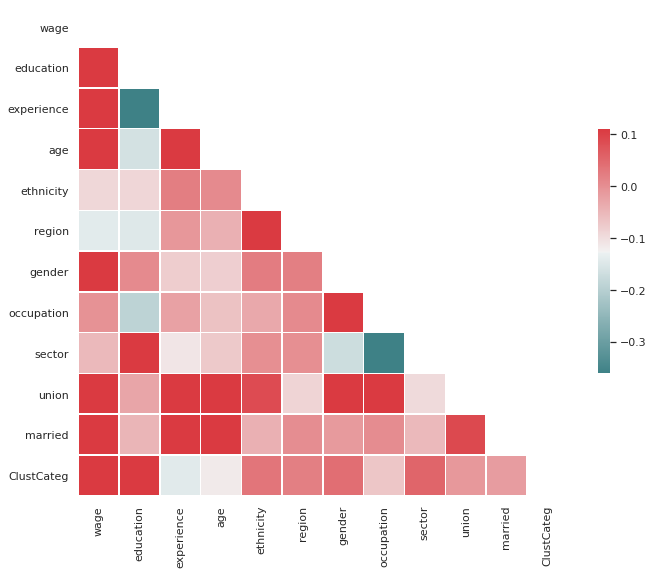

In [146]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = np.corrcoef(df1)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 11, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.11,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [147]:
df1 = transpose(df1)

VER VARIABLES


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


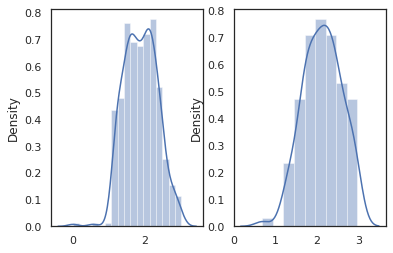

In [149]:
# import modules
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data
original_data = df1["wage"]
# split into testing & training data
train,test = train_test_split(original_data, shuffle=False)

# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
test_data = stats.boxcox(test, fitted_lambda)

# (optional) plot train & test
fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

RANDOM FOREST

In [212]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df1['wage'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df1.drop('wage', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [213]:
print(feature_list)

['education', 'experience', 'age', 'ethnicity', 'region', 'gender', 'occupation', 'sector', 'union', 'married', 'ClustCateg']


In [210]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 39)

In [211]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (399, 11)
Training Labels Shape: (399,)
Testing Features Shape: (133, 11)
Testing Labels Shape: (133,)


BASELINE

In [215]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('ClustCateg')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  7.53 degrees.


Training

In [205]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=39)

# Train the model on training data
rf.fit(train_features, train_labels);

Predicc

In [206]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.32 degrees.


In [207]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.17 %.


In [171]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = None, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [184]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = None, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

[0.10168737 0.08598299 0.12406241 0.01903781 0.01747788 0.03742103
 0.05237686 0.02057642 0.02857155 0.01827253 0.49453315]


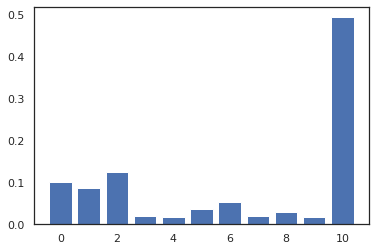

In [183]:
from sklearn.metrics import regression
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier

print(rf.feature_importances_)
from matplotlib import pyplot
pyplot.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
pyplot.show()

In [200]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.12
Variable: education            Importance: 0.1
Variable: experience           Importance: 0.09
Variable: occupation           Importance: 0.05
Variable: gender               Importance: 0.04
Variable: union                Importance: 0.03
Variable: ethnicity            Importance: 0.02
Variable: region               Importance: 0.02
Variable: sector               Importance: 0.02
Variable: married              Importance: 0.02
